In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load dataset
df = pd.read_csv('/content/student-mat.csv', sep=';')

In [3]:
# Drop less useful columns
df = df.drop(['school', 'guardian'], axis=1)

In [4]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [5]:
# Split features and target
X = df.drop(['G3'], axis=1)
y = df['G3']

In [6]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build model using Input layer
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
# Train model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

In [10]:
# Evaluate model
y_pred = model.predict(X_test_scaled).flatten()
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MSE: 7.6418256759643555
MAE: 2.077625274658203
R2 Score: 0.6273198127746582


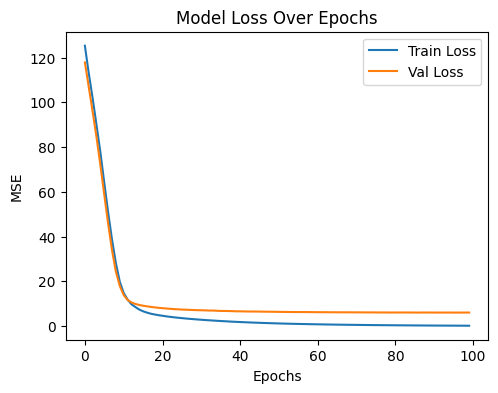

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

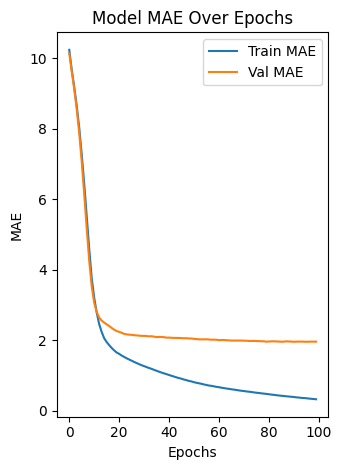

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

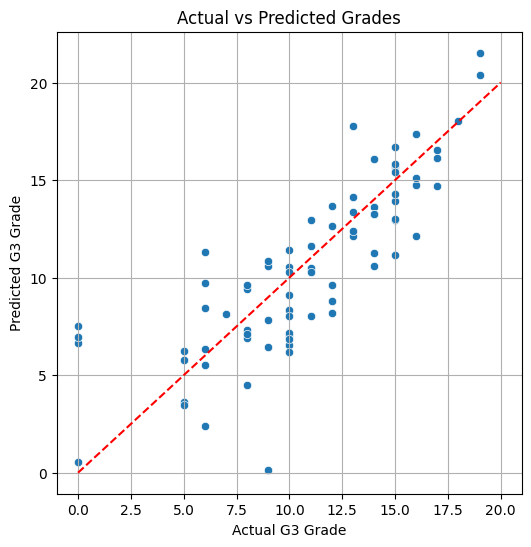

In [14]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 20], [0, 20], 'r--')
plt.xlabel('Actual G3 Grade')
plt.ylabel('Predicted G3 Grade')
plt.title('Actual vs Predicted Grades')
plt.grid(True)
plt.show()

In [11]:
# Save model
model.save('student_grade_predictor_model.h5')